In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [81]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
col = df.columns
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [83]:
new_col =['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [84]:
enc = OneHotEncoder(categories='auto').fit(df[new_col])
enc.categories_

[array(['Female', 'Male'], dtype=object),
 array([0, 1], dtype=int64),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [85]:
encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')

# Fit the encoder to the specified columns
encoded_df = pd.get_dummies(df[new_col], columns=new_col)

# Print the encoded DataFrame
encoded_df

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,True,False,True,False,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
1,False,True,True,False,True,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,True
2,False,True,True,False,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
3,False,True,True,False,True,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,True,False,True,False,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,True,True,False,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,True,False,True,False,False,True,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,True,False,True,False,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,False,True,False,True,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [86]:
new_df = pd.concat([encoded_df, df], axis=1)
new_df = new_df.drop(columns = new_col)
for i in new_df.columns[:-5]:
    # print(new_df[i] == True)
    new_df[i] = np.where(new_df[i] == True, 1, 0)
new_df

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,7590-VHVEG,1,29.85,29.85,No
1,0,1,1,0,1,0,1,0,0,1,...,0,0,0,0,1,5575-GNVDE,34,56.95,1889.5,No
2,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,3668-QPYBK,2,53.85,108.15,Yes
3,0,1,1,0,1,0,1,0,1,0,...,0,1,0,0,0,7795-CFOCW,45,42.30,1840.75,No
4,1,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,9237-HQITU,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,0,1,0,1,...,1,0,0,0,1,6840-RESVB,24,84.80,1990.5,No
7039,1,0,1,0,0,1,0,1,0,1,...,1,0,1,0,0,2234-XADUH,72,103.20,7362.9,No
7040,1,0,1,0,0,1,0,1,1,0,...,1,0,0,1,0,4801-JZAZL,11,29.60,346.45,No
7041,0,1,0,1,0,1,1,0,0,1,...,1,0,0,0,1,8361-LTMKD,4,74.40,306.6,Yes


In [87]:
new_df.drop(columns=['customerID'], inplace=True)
new_df

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,29.85,29.85,No
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,34,56.95,1889.5,No
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,2,53.85,108.15,Yes
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,0,45,42.30,1840.75,No
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,24,84.80,1990.5,No
7039,1,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,0,72,103.20,7362.9,No
7040,1,0,1,0,0,1,0,1,1,0,...,0,1,0,0,1,0,11,29.60,346.45,No
7041,0,1,0,1,0,1,1,0,0,1,...,0,1,0,0,0,1,4,74.40,306.6,Yes


In [88]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7043 non-null   int32  
 1   gender_Male                              7043 non-null   int32  
 2   SeniorCitizen_0                          7043 non-null   int32  
 3   SeniorCitizen_1                          7043 non-null   int32  
 4   Partner_No                               7043 non-null   int32  
 5   Partner_Yes                              7043 non-null   int32  
 6   Dependents_No                            7043 non-null   int32  
 7   Dependents_Yes                           7043 non-null   int32  
 8   PhoneService_No                          7043 non-null   int32  
 9   PhoneService_Yes                         7043 non-null   int32  
 10  MultipleLines_No                         7043 no

In [89]:
new_df['TotalCharges'] = new_df['TotalCharges'].replace(' ', 0)
new_df['TotalCharges'].value_counts()

TotalCharges
0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [90]:
new_df['Churn'] = np.where(new_df['Churn'] == 'Yes', 1, 0)
new_df

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,29.85,29.85,0
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,34,56.95,1889.5,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,2,53.85,108.15,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,0,45,42.30,1840.75,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,24,84.80,1990.5,0
7039,1,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,0,72,103.20,7362.9,0
7040,1,0,1,0,0,1,0,1,1,0,...,0,1,0,0,1,0,11,29.60,346.45,0
7041,0,1,0,1,0,1,1,0,0,1,...,0,1,0,0,0,1,4,74.40,306.6,1


In [91]:
data = new_df.iloc[:, :-1]
labels = new_df.iloc[:, -1]

In [95]:
def PCA_n(data, labels, num_components, Normalize = True):
    # Separate features and labels
    X = data
    y = labels

    # Standardize the data (important for PCA)
    if Normalize:
        X_standardized = StandardScaler().fit_transform(X)
    else:
        X_standardized = X

    # Apply PCA
    # num_components = 3  # You can choose the number of components based on your requirement
    pca = PCA(n_components=num_components)
    principal_components = pca.fit_transform(X_standardized)

    # Create a DataFrame with the principal components and labels
    columns = [f'PC{i}' for i in range(1,num_components+1)]

    
    principal_df = pd.DataFrame(data=principal_components, columns=columns)
    final_df = pd.concat([principal_df, y], axis=1)
    return final_df
    # print(final_df3)

In [96]:
pca_2 = PCA_n(data, labels, 2)
pca_2

[[ 1.00955867 -1.00955867  0.43991649 ... -1.16032292 -0.99261052
  -0.16467045]
 [-0.99053183  0.99053183  0.43991649 ... -0.25962894 -0.17216471
  -0.16467045]
 [-0.99053183  0.99053183  0.43991649 ... -0.36266036 -0.9580659
  -0.16467045]
 ...
 [ 1.00955867 -1.00955867  0.43991649 ... -1.1686319  -0.85293201
  -0.16467045]
 [-0.99053183  0.99053183 -2.27315869 ...  0.32033821 -0.87051315
  -0.16467045]
 [-0.99053183  0.99053183  0.43991649 ...  1.35896134  2.01389665
   1.19656661]]


,PC1,PC2,Churn
0,-1.725841,-3.111577,0
1,-0.218083,-1.125851,0
2,-0.643153,-2.872487,1
3,-1.302287,0.197564,0
4,-1.507325,-4.324581,1
...,...,...,...
7038,-1.577467,3.176454,0
7039,-2.752464,4.228059,0
7040,-1.430552,-2.315953,0
7041,-1.918078,-3.007859,1


e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


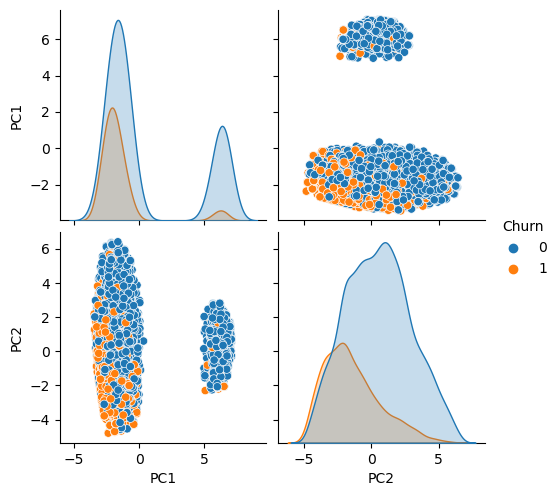

In [50]:
sns.pairplot(pca_2, hue = 'Churn')

In [57]:
pca_3 = PCA_n(data, labels, 3)
pca_3

,PC1,PC2,PC3,Churn
0,-1.950472,-3.029240,4.550463,0
1,-0.282801,-1.176652,1.953055,0
2,-0.819235,-2.875627,1.235878,1
3,-0.998165,-0.057385,6.352763,0
4,-1.804375,-4.193250,-1.256595,1
...,...,...,...,...
7038,-1.164601,3.097345,1.171916,0
7039,-2.346146,4.352164,-1.460657,0
7040,-1.602138,-2.270748,5.488284,0
7041,-2.174941,-2.787284,-1.674199,1


e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


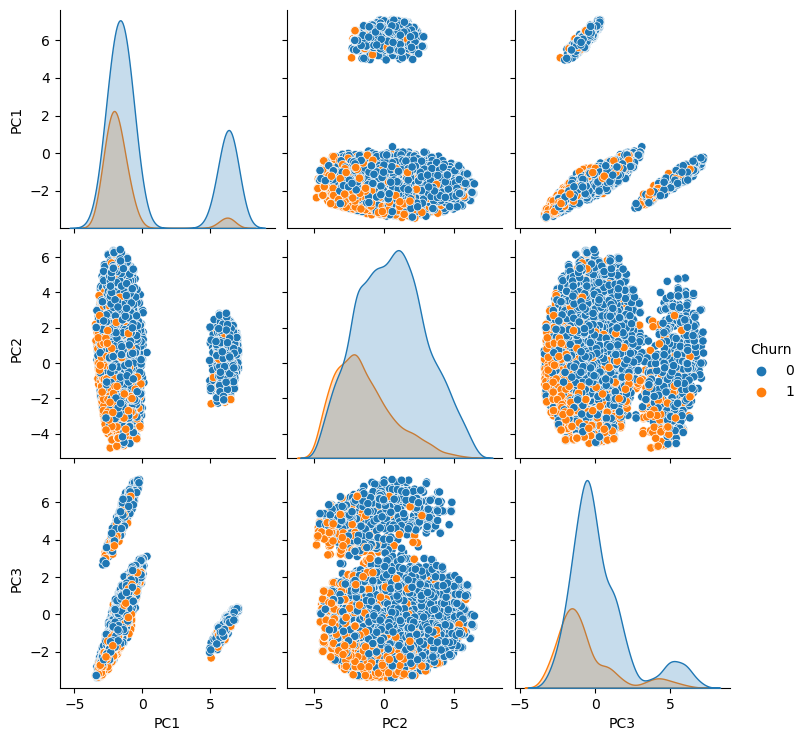

In [58]:
sns.pairplot(pca_3, hue = 'Churn')

e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

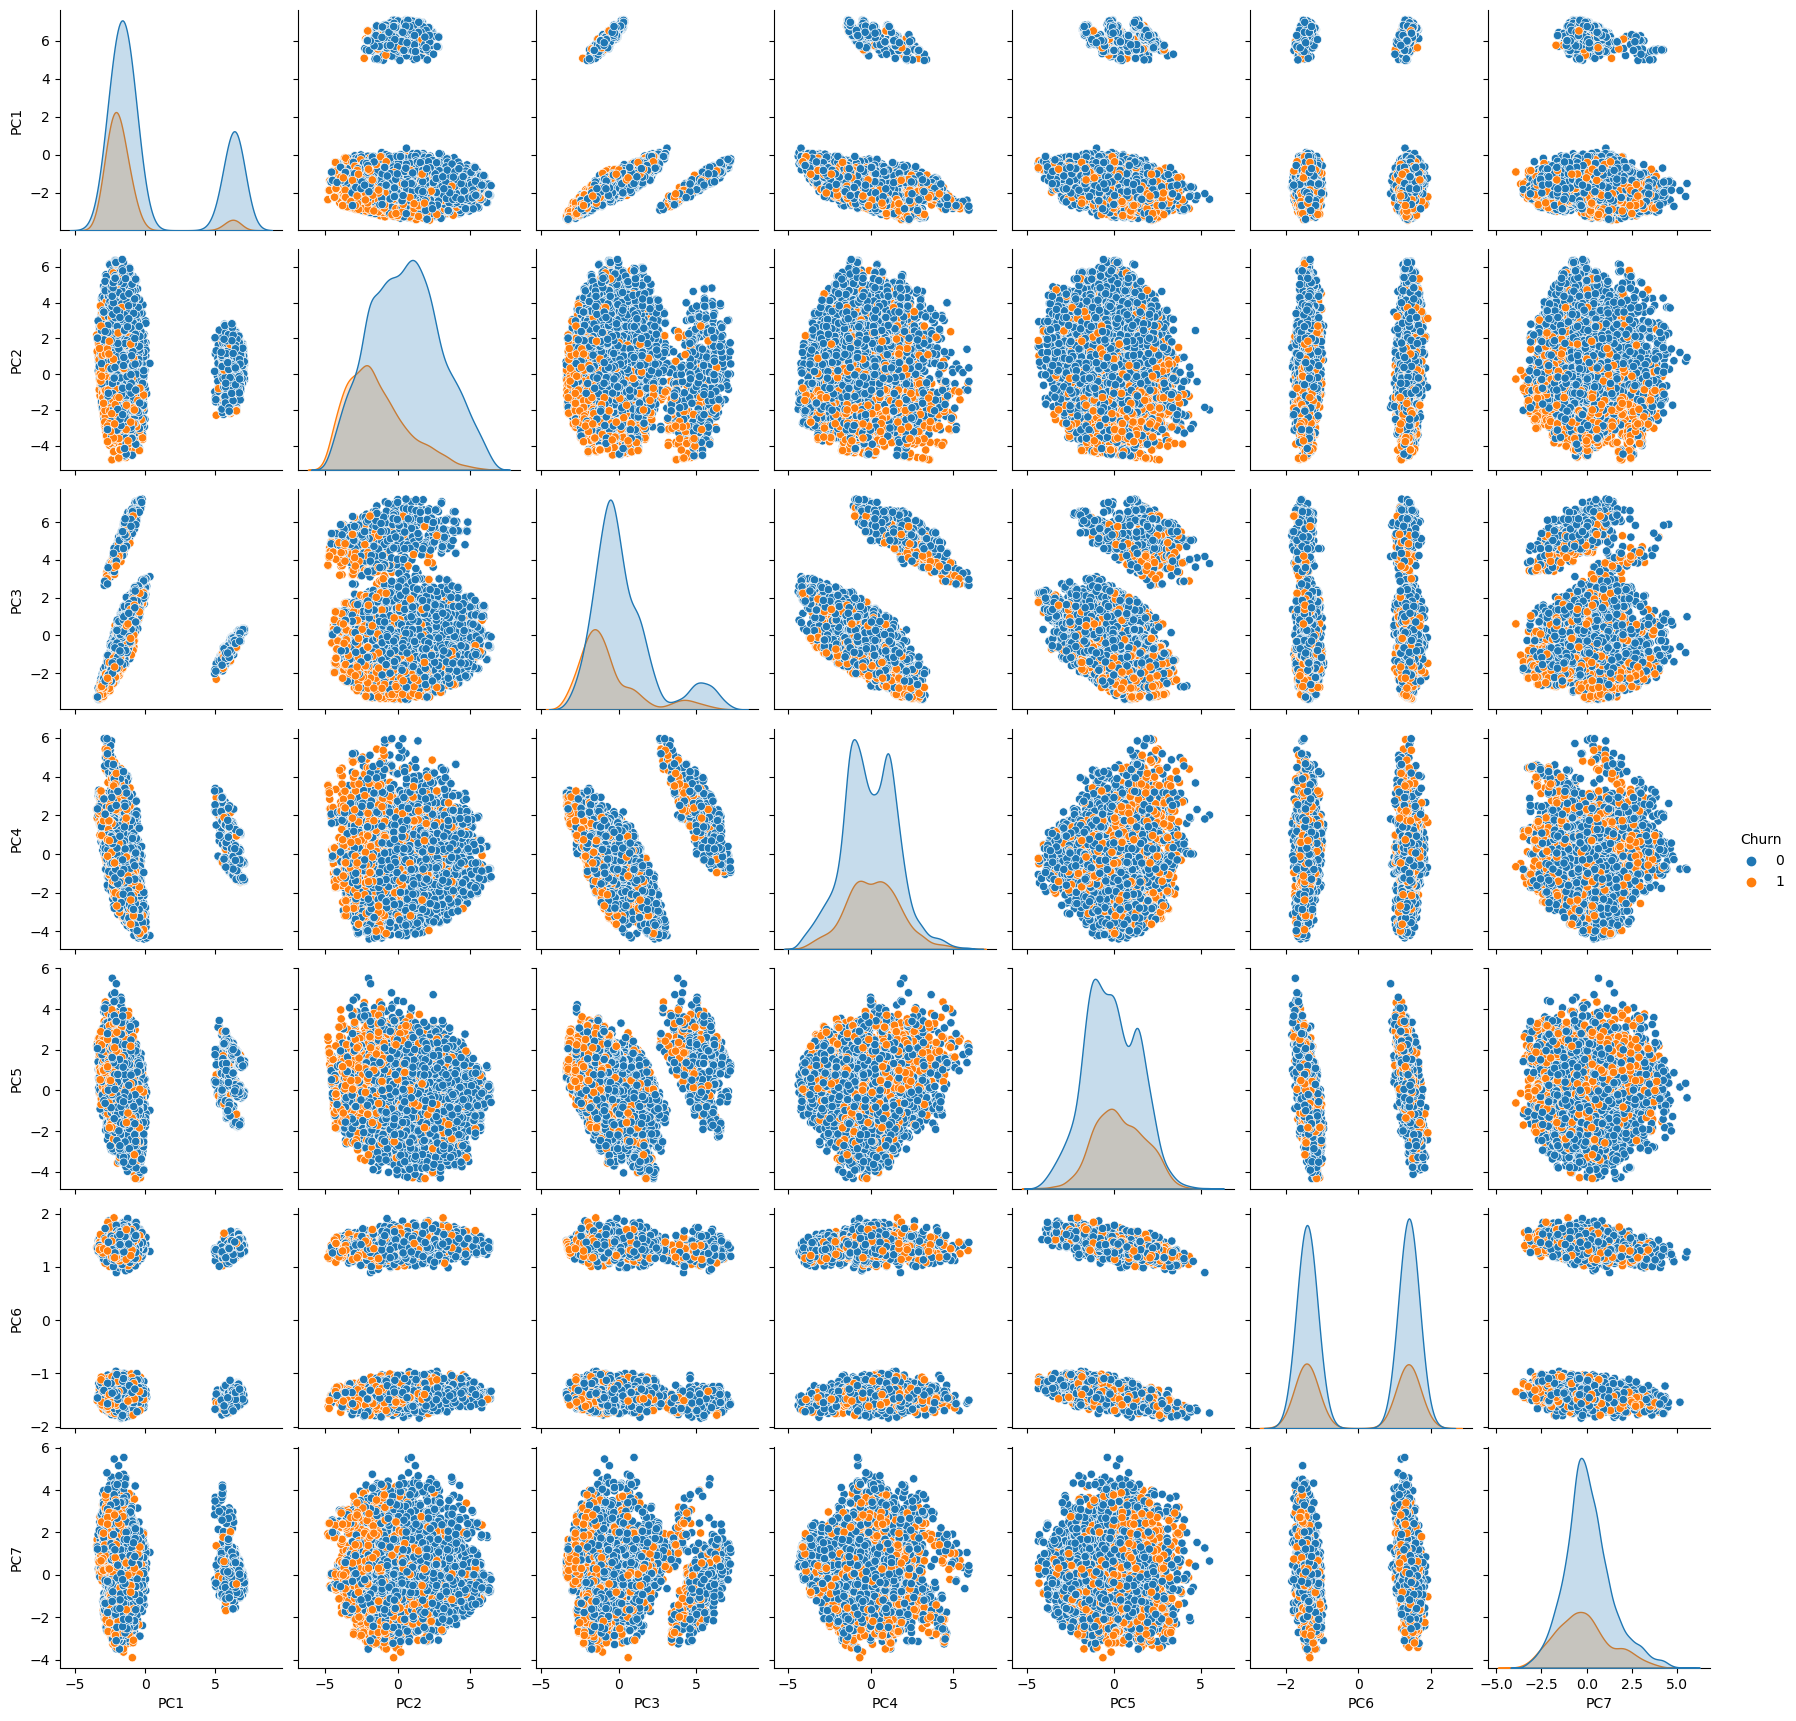

In [65]:
pca_7 = PCA_n(data, labels, 7)
sns.pairplot(pca_7, hue = 'Churn')

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


In [78]:
score = cross_val_score(LogisticRegression(), pca_2.iloc[:,:-1], pca_2.iloc[:,-1], scoring='f1_macro')

print(score.mean())

0.6503562527834507


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # For 3D visualization if needed

# Load your dataset
data_cluster = data

# Assuming your features are in columns 'feature1', 'feature2', 'feature3'
features = data_cluster

# Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Choose the number of clusters (k)
k = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data_cluster['cluster'] = kmeans.fit_predict(features_standardized)

e:\miniconda3\envs\churn_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [101]:
data_cluster

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,cluster
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,29.85,29.85,3
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,34,56.95,1889.5,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,2,53.85,108.15,0
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,0,45,42.30,1840.75,3
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,24,84.80,1990.5,4
7039,1,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,0,72,103.20,7362.9,4
7040,1,0,1,0,0,1,0,1,1,0,...,0,1,0,0,1,0,11,29.60,346.45,3
7041,0,1,0,1,0,1,1,0,0,1,...,0,1,0,0,0,1,4,74.40,306.6,2


[[ 1.00955867 -1.00955867  0.43991649 ... -1.27744458 -1.16032292
  -0.99261052]
 [-0.99053183  0.99053183  0.43991649 ...  0.06632742 -0.25962894
  -0.17216471]
 [-0.99053183  0.99053183  0.43991649 ... -1.23672422 -0.36266036
  -0.9580659 ]
 ...
 [ 1.00955867 -1.00955867  0.43991649 ... -0.87024095 -1.1686319
  -0.85293201]
 [-0.99053183  0.99053183 -2.27315869 ... -1.15528349  0.32033821
  -0.87051315]
 [-0.99053183  0.99053183  0.43991649 ...  1.36937906  1.35896134
   2.01389665]]


e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\miniconda3\envs\churn_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


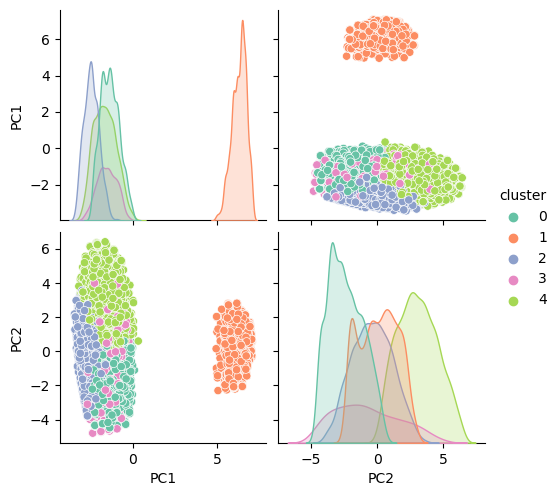

In [117]:
pca_cluster = PCA_n(data_cluster.iloc[:,:-1], data_cluster.iloc[:,-1], 2)
sns.pairplot(pca_cluster, hue = 'cluster',palette="Set2")

In [118]:
pca_cluster['cluster']

0       3
1       0
2       0
3       3
4       0
       ..
7038    4
7039    4
7040    3
7041    2
7042    4
Name: cluster, Length: 7043, dtype: int32

In [139]:
pca_cluster['Churn'] = np.where((pca_cluster['cluster'] == 2), 1, 0)


In [140]:
f1_score(labels,pca_cluster['Churn'],average = 'micro')

0.74329121113162